In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
cell_data = pd.read_csv('data/cells_no_repeats.csv', index_col=0)

In [31]:
sequence_counts_k3 = pd.read_csv(f'data/sequence_counts/unfiltered/split_seq/sequence_counts_k3.csv', index_col=0)
sequence_counts_k4 = pd.read_csv(f'data/sequence_counts/unfiltered/split_seq/sequence_counts_k4.csv', index_col=0)
sequence_counts_k5 = pd.read_csv(f'data/sequence_counts/unfiltered/split_seq/sequence_counts_k5.csv', index_col=0)
sequence_counts_k6 = pd.read_csv(f'data/sequence_counts/unfiltered/split_seq/sequence_counts_k6.csv', index_col=0)
sequence_counts = [sequence_counts_k3, sequence_counts_k4, sequence_counts_k5, sequence_counts_k6]
display(sequence_counts_k3.head())
display(sequence_counts_k4.head())
display(sequence_counts_k5.head())
display(sequence_counts_k6.head())

,sequence_0,sequence_1,sequence_2,count,diversity
0,864691135348297687,864691136418647703,864691135474761792,1,3
1,864691136388590711,864691136388590711,864691136388590711,3,1
2,864691135761545526,864691135761545526,864691136812041331,1,2
3,864691135772039931,864691136903065778,864691136378754261,1,3
4,864691136056701144,864691136422832687,864691135866412566,1,3


,sequence_0,sequence_1,sequence_2,sequence_3,count,diversity
0,864691135761545526,864691135761545526,864691136812041331,864691136812041331,1,2
1,864691136486788370,864691135866412566,864691136422832687,864691136056701144,1,4
2,864691135837171859,864691135809439692,864691135809439692,864691136011228579,1,3
3,864691135585153148,864691135570709485,864691136965773518,864691135575128350,1,4
4,864691136722356078,864691135509712324,864691135472023602,864691136816759662,1,4


,sequence_0,sequence_1,sequence_2,sequence_3,sequence_4,count,diversity
0,864691135420483058,864691135463697733,864691135415448506,864691136740412764,864691135684083895,1,5
1,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430,1,3
2,864691135404012526,864691135660521712,864691135660521712,864691135660521712,864691135660521712,1,2
3,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585,1,5
4,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022,1,5


,sequence_0,sequence_1,sequence_2,sequence_3,sequence_4,sequence_5,count,diversity
0,864691135739717012,864691136388590711,864691135415448506,864691136740412764,864691135684083895,864691135463697733,1,6
1,864691135739717012,864691136388590711,864691135415448506,864691136388590711,864691136388590711,864691135420483058,1,4
2,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585,864691135730537145,1,6
3,864691136041046102,864691136422832687,864691135526099547,864691136422832687,864691136486788370,864691135866412566,1,5
4,864691134917384458,864691135338086118,864691136723314173,864691135937724981,864691135012855446,864691136134450827,1,6


In [37]:
# Get the top ten most frequent sequences from each value of k
t = 20
top_ten_k3 = sequence_counts_k3.sort_values(by='count', ascending=False).head(t)
top_ten_k4 = sequence_counts_k4.sort_values(by='count', ascending=False).head(t)
top_ten_k5 = sequence_counts_k5.sort_values(by='count', ascending=False).head(t)
top_ten_k6 = sequence_counts_k6.sort_values(by='count', ascending=False).head(t)

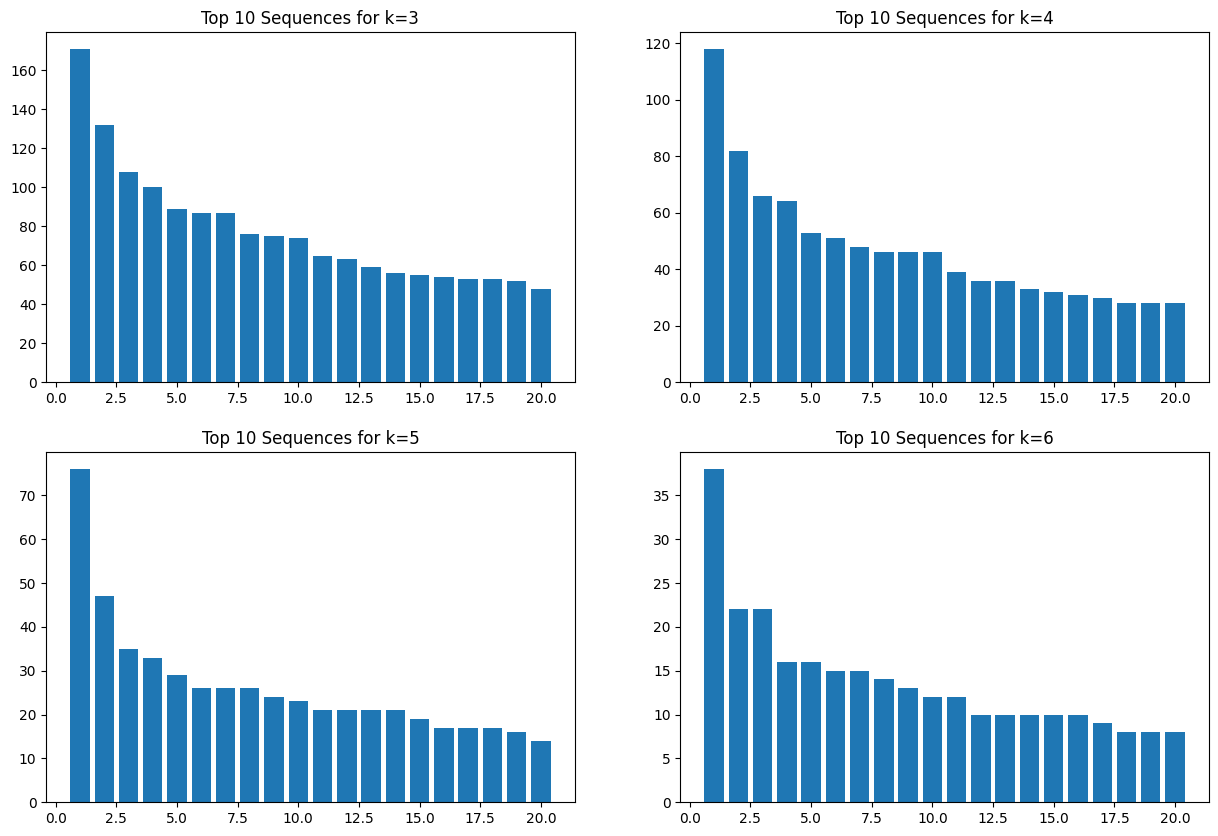

In [38]:
# Plot the top ten most frequent sequences from each value of k
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].bar(np.arange(1, t+1), top_ten_k3['count'])
axs[0, 0].set_title('Top 10 Sequences for k=3')
axs[0, 1].bar(np.arange(1, t+1), top_ten_k4['count'])
axs[0, 1].set_title('Top 10 Sequences for k=4')
axs[1, 0].bar(np.arange(1, t+1), top_ten_k5['count'])
axs[1, 0].set_title('Top 10 Sequences for k=5')
axs[1, 1].bar(np.arange(1, t+1), top_ten_k6['count'])
axs[1, 1].set_title('Top 10 Sequences for k=6')
plt.show()

In [39]:
# Create a dictionary mapping each cell id to its cell type
id_to_ct_dict = {}
for i, row in cell_data.iterrows():
    id_to_ct_dict[row['pt_root_id']] = row['cell_type']

For each highly repeating sequence, here's what I want to do:

1. Determine its cell type
2. Determine the post-synaptic cell type for each appearance
3. Determine if there is any overlap between the appearances
4. Record centroid of each appearance (for plotting)

Benchmark for highly repeating sequence: more than 5 appearances

Start with doing this for k=5,6 since k=3,4 may not be as interesting (can add in k=3,4 later)

In [46]:
# Specify k
k = 5

In [53]:
clusters_w_seqs = pd.read_csv(f'data/synapse_clusters/with_sequences/clusters_k{k}.csv', index_col=0)

seq_keys = [f'sequence_rank_{i}' for i in range(k)]
all_sequences = clusters_w_seqs[seq_keys]

syn_keys = [f'synapse_id_{i}' for i in range(k)]
all_synapses = clusters_w_seqs[syn_keys]

display(clusters_w_seqs.head())
display(all_sequences.head())
display(all_synapses.head())

,synapse_id_0,synapse_id_1,synapse_id_2,synapse_id_3,synapse_id_4,density_score,post_pt_root_id,post_cell_type,centroid_x,centroid_y,centroid_z,sequence_rank_0,sequence_rank_1,sequence_rank_2,sequence_rank_3,sequence_rank_4
cluster_id,,,,,,,,,,,,,,,,
0,923889,912217,906864,900422,941001,0.413845,864691134884741370,4P,573.3296,689.8856,1049.288,864691135420483058,864691135463697733,864691135415448506,864691136740412764,864691135684083895
1,677928,680389,677164,678984,681563,0.456460,864691134884742906,6P-IT,500.4736,1020.7520,1002.048,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430
2,657643,695427,680348,675225,679270,0.409908,864691134884742906,6P-IT,417.8064,574.3232,903.032,864691135404012526,864691135660521712,864691135660521712,864691135660521712,864691135660521712
3,674327,704519,662648,676483,709257,0.418260,864691134884742906,6P-IT,488.3336,877.0656,937.072,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585
4,708116,673286,684750,713306,690728,0.446153,864691134884742906,6P-IT,586.6272,744.3880,882.984,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022


,sequence_rank_0,sequence_rank_1,sequence_rank_2,sequence_rank_3,sequence_rank_4
cluster_id,,,,,
0,864691135420483058,864691135463697733,864691135415448506,864691136740412764,864691135684083895
1,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430
2,864691135404012526,864691135660521712,864691135660521712,864691135660521712,864691135660521712
3,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585
4,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022


,synapse_id_0,synapse_id_1,synapse_id_2,synapse_id_3,synapse_id_4
cluster_id,,,,,
0,923889,912217,906864,900422,941001
1,677928,680389,677164,678984,681563
2,657643,695427,680348,675225,679270
3,674327,704519,662648,676483,709257
4,708116,673286,684750,713306,690728


In [92]:
# Narrow our dataframe downt to highly repeating sequences
burst_sequences = sequence_counts[k-3].loc[(sequence_counts[k-3]['diversity'] == 1)].loc[(sequence_counts[k-3]['count'] > 5)]
burst_sequences = burst_sequences.sort_values(by='count', ascending=False)
print(burst_sequences.shape)
display(burst_sequences.head())

(71, 7)


,sequence_0,sequence_1,sequence_2,sequence_3,sequence_4,count,diversity
433,864691135233408857,864691135233408857,864691135233408857,864691135233408857,864691135233408857,76,1
530,864691135848267614,864691135848267614,864691135848267614,864691135848267614,864691135848267614,47,1
16798,864691136811841139,864691136811841139,864691136811841139,864691136811841139,864691136811841139,35,1
3092,864691135213044608,864691135213044608,864691135213044608,864691135213044608,864691135213044608,33,1
364,864691137197327937,864691137197327937,864691137197327937,864691137197327937,864691137197327937,29,1


In [93]:
def get_cluster_ids(all_sequences, sequence):
    clusters = all_sequences.loc[all_sequences.apply(lambda x: (tuple(sequence) == tuple(x)) or (tuple(sequence) == tuple(x[::-1])), axis=1)]
    return clusters.index.values.astype(int)

In [94]:
def analyze_burst(clusters_df, sequences_df, sequence, k):
    pre_cell_type = id_to_ct_dict[sequence[0]]
    cluster_ids = get_cluster_ids(sequences_df, sequence)
    post_cell_types = []
    post_cell_ids = []

    for cluster_id in cluster_ids:
        cluster = clusters_df.loc[cluster_id]
        post_cell_types.append(cluster['post_cell_type'])
        post_cell_ids.append(cluster['post_pt_root_id'])

    return pre_cell_type, list(post_cell_types), list(post_cell_ids)

In [107]:
pre_cell_types = []
all_post_cell_types = []
all_post_cell_ids = []
seq_keys = [f'sequence_{i}' for i in range(k)]
for i, row in burst_sequences.iterrows():
    sequence = row[seq_keys].values

    pre_cell_type, post_cell_types, post_cell_ids = analyze_burst(clusters_w_seqs, all_sequences, sequence, k)
    pre_cell_types.append(pre_cell_type)
    all_post_cell_types.extend(post_cell_types)
    all_post_cell_ids.extend(post_cell_ids)

    print(f'Appearances: {row["count"]}')
    print(f'Pre cell type: {pre_cell_type}')
    print(f'Post cell types: {post_cell_types}')
    print(f'Number of unique post-cells: {len(set(post_cell_ids))}')
    print('')

Appearances: 76
Pre cell type: 4P
Post cell types: ['23P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '23P', '4P', '23P', '23P', '23P', '4P', '4P', '23P', '23P', '23P', '23P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '23P', '23P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '23P', '4P', '4P', '4P', '4P', '23P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '23P', '4P', '4P', '4P', '4P', '4P', '4P', '4P', '4P']
Number of unique post-cells: 53

Appearances: 47
Pre cell type: 23P
Post cell types: ['4P', '23P', '23P', '5P-ET', '4P', '4P', '23P', '4P', '5P-IT', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '4P', '23P', '23P', '23P', '4P', '23P', '23P', '4P', '23P', '23P', '23P', '4P', '23P', '4P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '23P', '5P-IT', '23P', '23P', '23P']
Number of unique post-cells: 37

Appearances: 35
Pre cell type: 6P

In [108]:
cells_by_type = cell_data.groupby('cell_type').size() / 100
display(cells_by_type)

cell_type
23P      173.08
4P       129.69
5P-ET     14.29
5P-IT     85.76
5P-NP      4.37
6P-CT     54.14
6P-IT    100.76
dtype: float64

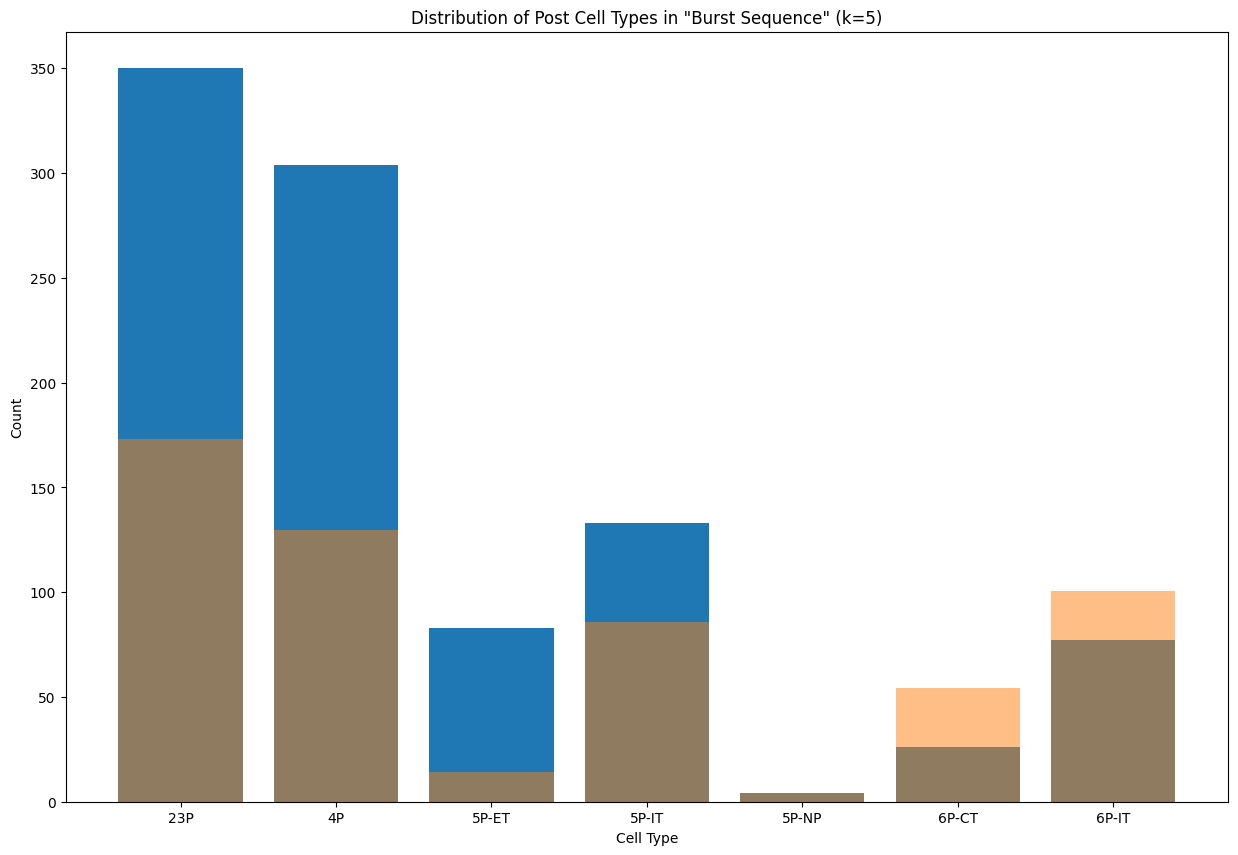

In [109]:
# Plot the distribution of post cell types
fig, ax = plt.subplots(figsize=(15, 10))
cell_types = list(cells_by_type.index)
cell_type_counts = [all_post_cell_types.count(cell_type) for cell_type in cell_types]
ax.bar(cell_types, cell_type_counts)
ax.bar(cell_types, cells_by_type, alpha=0.5)
ax.set_xlabel('Cell Type')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Post Cell Types in "Burst Sequence" (k={k})')
plt.show()

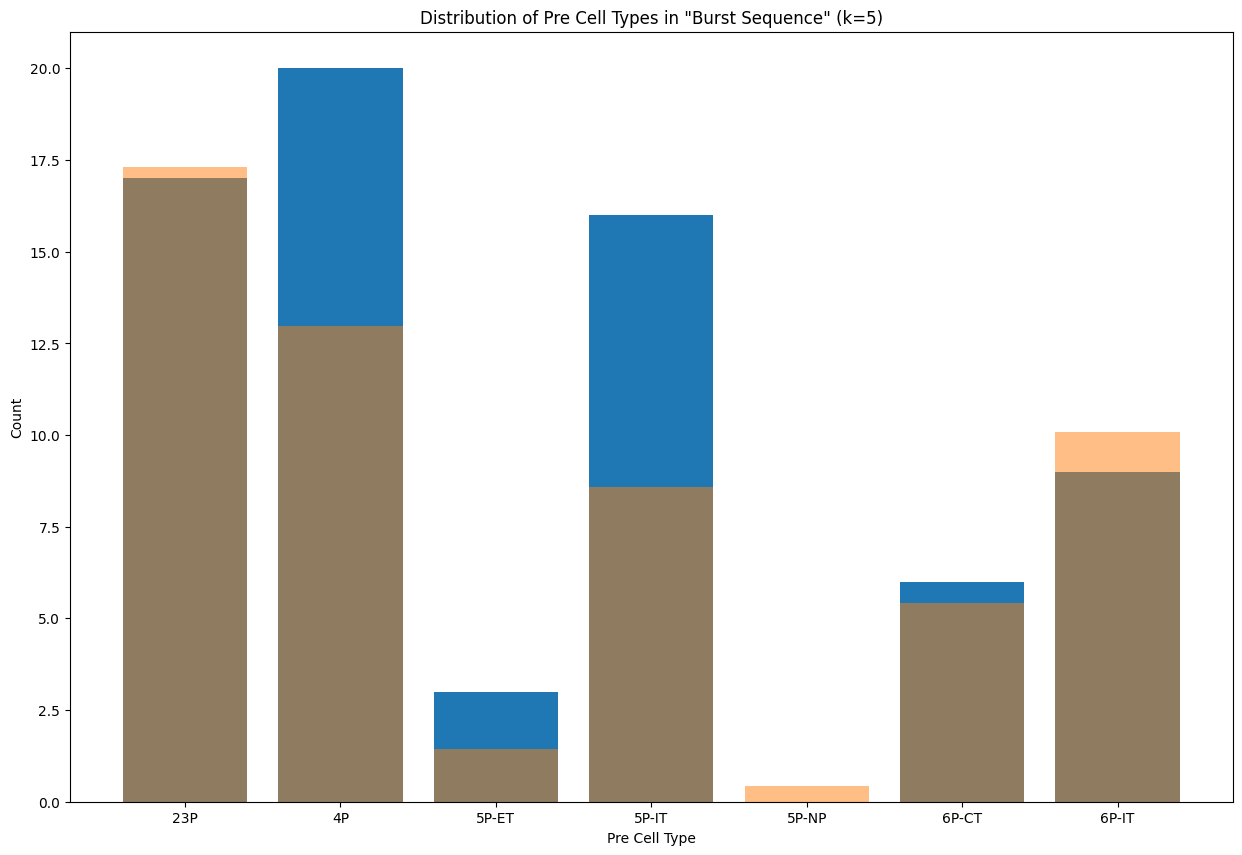

In [111]:
# Plot the distribution of pre cell types
fig, ax = plt.subplots(figsize=(15, 10))
cell_types = list(cells_by_type.index)
cell_type_counts = [pre_cell_types.count(cell_type) for cell_type in cell_types]
ax.bar(cell_types, cell_type_counts)
ax.bar(cell_types, cells_by_type, alpha=0.5)
ax.set_xlabel('Pre Cell Type')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Pre Cell Types in "Burst Sequence" (k={k})')
plt.show()